First you need to simulate the light curve of the star while the planet is in transit.  
Assume that the planet emits no light of it's own, and ignore limb darkening.  

Parameters of this plot should be 
* Radius of star ($R_s$),
* Radius of planet ($R_p$),
* Orbital Radius ($a$),
* Orbital period ($P$),
* Angle of inclination ($i$)

Flux of the star can be normalized to 1.

We need to find $t_T$ and $t_F$ and maximum dip in Intensity ($\delta$)

${\large \delta = \left( \frac{R_p}{R_s} \right)^2}\tag{1.2}$

${\large \left( \frac{t_F}{t_T} \right) ^ 2 = \frac {\left[ 1 - \frac{R_p}{R_s} \right]^2 - \left[ \frac{a \cos i }{R_s} \right]^2} {\left[ 1 + \frac{R_p}{R_s} \right]^2 - \left[ \frac{a \cos i }{R_s} \right]^2} }\tag{1.4}$

${\large t_T = \frac{P R_s}{\pi a} \sqrt{ \left( 1 + \frac{R_p}{R_s} \right) ^ 2 - \left( \frac{a}{R_s} \cos i \right)^2 } }\tag{1.6}$

${\large t_F = \frac{P R_s}{\pi a} \sqrt{ \left( 1 - \frac{R_p}{R_s} \right) ^ 2 - \left( \frac{a}{R_s} \cos i \right)^2 } }\tag{from 1.4 and 1.6}$

In [56]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
def delta_tT_tF(R_s, R_p, a, P, i):
    prop = (P * R_s) / (np.pi * a)
    ratio = R_p / R_s
    b = a * np.cos(i*np.pi/180) / R_s
    print(b)

    t_T = prop * ((((1 + ratio) ** 2) - (b ** 2)) ** 0.5)
    t_F = prop * ((((1 - ratio) ** 2) - (b ** 2)) ** 0.5)
    
    delta = ratio * ratio
    
    return delta, t_T, t_F    

In [88]:
t = np.linspace(0.0, 1.0, 2000000)

In [89]:
def flux_time(delta, t_T, t_F, x):
    t1, t2 = t_T / 2, t_F / 2
    flux = []
    for time in x:
        if time < 0.5 - t1:
            flux.append(1.0)
        elif time < 0.5 - t2:
            diff_fl = (time - 0.5 + t1) * delta / (t1 - t2)
            flux.append(1.0 - diff_fl)
        elif time < 0.5 + t2:
            flux.append(1.0 - delta)
        elif time < 0.5 + t1:
            diff_fl = (0.5 + t1 - time) * delta / (t1 - t2)
            flux.append(1.0 - diff_fl)
        else:
            flux.append(1.0)
    return flux

In [90]:
R_s, R_p, a, P, i = 696340000, 69911000, 778500000000, 4332.59*24*3600, 90

In [91]:
delta, t_T, t_F = delta_tT_tF(R_s, R_p, a, P, i)
print(delta, t_T, t_F)

6.845704204384456e-14
0.010079717076411147 117279.98457444001 95879.26600680703


In [92]:
y = flux_time(delta, t_T/P, t_F/P, t)
print(t_F/P)

0.00025613171957896704


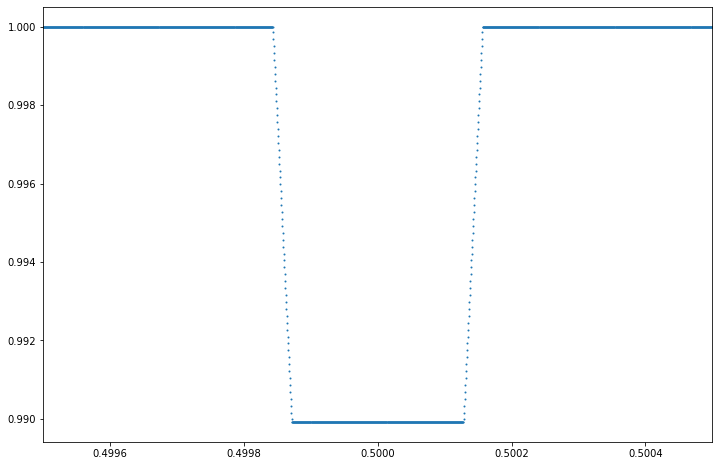

In [93]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, xlim=(0.4995,0.5005))

ax.scatter(t, y, s=1)